In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 # figure dots per inch
%matplotlib inline

import seaborn as sns
sns.set()

from datetime import datetime, timedelta

In [3]:
# Load transactions (all data including March)  
transactions_df = pd.read_pickle('Data/Processed/transactions_to_split.pickle')
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt,transaction_date_day,membership_expire_date_day,transaction_date_month,membership_expire_date_month,transaction_date_year,membership_expire_date_year,plan_duration,credit,transaction_credit
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,payment_method_id_41,30,149,149,1,20150930,20151031,0,2015-09-30,2015-10-31,Wed,Sat,Sep,Oct,2015,2015,31.0,0,even
10,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,payment_method_id_other,30,149,149,1,20150930,20151121,0,2015-09-30,2015-11-21,Wed,Sat,Sep,Nov,2015,2015,52.0,0,even
24,qNpZJ7gsMPAFSvc5V3kgqtFfUQU2SZe7XSUYOAfqtoA=,payment_method_id_40,30,149,149,1,20151001,20151101,0,2015-10-01,2015-11-01,Thu,Sun,Oct,Nov,2015,2015,31.0,0,even
26,WnxdSgeK3Vg4BIaioJQYilnL+E1SDxq+PZIwmmfTwgM=,payment_method_id_34,0,0,149,1,20150930,20151031,0,2015-09-30,2015-10-31,Wed,Sat,Sep,Oct,2015,2015,31.0,149,credit
27,ir1jh/vWZ932FpSC2WeMxdOHQ+OkuUo3ZPQs8Ms4J9g=,payment_method_id_34,0,0,149,1,20150930,20151031,0,2015-09-30,2015-10-31,Wed,Sat,Sep,Oct,2015,2015,31.0,149,credit


In [4]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13664286 entries, 1 to 22974713
Data columns (total 20 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   msno                          object        
 1   payment_method_id             object        
 2   payment_plan_days             int16         
 3   plan_list_price               int16         
 4   actual_amount_paid            int16         
 5   is_auto_renew                 int16         
 6   transaction_date              int64         
 7   membership_expire_date        int64         
 8   is_cancel                     int16         
 9   transaction_date_dt           datetime64[ns]
 10  membership_expire_date_dt     datetime64[ns]
 11  transaction_date_day          object        
 12  membership_expire_date_day    object        
 13  transaction_date_month        object        
 14  membership_expire_date_month  object        
 15  transaction_date_year         

## Generate Training Set

Current day is February 1st, we consider members which expiration date is in January and potentially churn in February.
Therefore, we take transactions until the end of January - this will serve as training dataset.

In [5]:
current_day = datetime(2017, 2, 1)
transactions_df = transactions_df[(transactions_df['transaction_date_dt'] < current_day) &
                                 (transactions_df['membership_expire_date_dt'] < current_day)].reset_index(drop=True)
transactions_df.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt,transaction_date_day,membership_expire_date_day,transaction_date_month,membership_expire_date_month,transaction_date_year,membership_expire_date_year,plan_duration,credit,transaction_credit
0,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,payment_method_id_41,30,149,149,1,20150930,20151031,0,2015-09-30,2015-10-31,Wed,Sat,Sep,Oct,2015,2015,31.0,0,even
1,bQkbrEPdMfVfdsoz0RoWSmgYpHJuhRqtIml7aRUrFL8=,payment_method_id_other,30,149,149,1,20150930,20151121,0,2015-09-30,2015-11-21,Wed,Sat,Sep,Nov,2015,2015,52.0,0,even
2,qNpZJ7gsMPAFSvc5V3kgqtFfUQU2SZe7XSUYOAfqtoA=,payment_method_id_40,30,149,149,1,20151001,20151101,0,2015-10-01,2015-11-01,Thu,Sun,Oct,Nov,2015,2015,31.0,0,even
3,WnxdSgeK3Vg4BIaioJQYilnL+E1SDxq+PZIwmmfTwgM=,payment_method_id_34,0,0,149,1,20150930,20151031,0,2015-09-30,2015-10-31,Wed,Sat,Sep,Oct,2015,2015,31.0,149,credit
4,ir1jh/vWZ932FpSC2WeMxdOHQ+OkuUo3ZPQs8Ms4J9g=,payment_method_id_34,0,0,149,1,20150930,20151031,0,2015-09-30,2015-10-31,Wed,Sat,Sep,Oct,2015,2015,31.0,149,credit


In [6]:
transactions_df.shape

(12731164, 20)

In [7]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12731164 entries, 0 to 12731163
Data columns (total 20 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   msno                          object        
 1   payment_method_id             object        
 2   payment_plan_days             int16         
 3   plan_list_price               int16         
 4   actual_amount_paid            int16         
 5   is_auto_renew                 int16         
 6   transaction_date              int64         
 7   membership_expire_date        int64         
 8   is_cancel                     int16         
 9   transaction_date_dt           datetime64[ns]
 10  membership_expire_date_dt     datetime64[ns]
 11  transaction_date_day          object        
 12  membership_expire_date_day    object        
 13  transaction_date_month        object        
 14  membership_expire_date_month  object        
 15  transaction_date_year         

In [8]:
transactions_df.describe()

,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_year,membership_expire_date_year,plan_duration,credit
count,1.273116e+07,1.273116e+07,1.273116e+07,1.273116e+07,1.273116e+07,1.273116e+07,1.273116e+07,1.273116e+07,1.273116e+07,1.273116e+07,1.273116e+07
mean,2.956544e+01,1.305077e+02,1.354186e+02,9.062211e-01,2.015724e+07,2.015835e+07,1.686366e-02,2.015651e+03,2.015765e+03,3.421180e+01,4.910899e+00
std,1.515461e+01,6.925421e+01,6.557675e+01,2.915209e-01,4.786652e+03,5.486723e+03,1.287605e-01,4.788543e-01,5.592019e-01,3.557271e+01,3.360591e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015010e+07,2.015010e+07,0.000000e+00,2.015000e+03,2.015000e+03,0.000000e+00,-6.990000e+02
25%,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,2.015101e+07,2.015112e+07,0.000000e+00,2.015000e+03,2.015000e+03,3.000000e+01,0.000000e+00
50%,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016041e+07,2.016052e+07,0.000000e+00,2.016000e+03,2.016000e+03,3.100000e+01,0.000000e+00
75%,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,2.016090e+07,2.016100e+07,0.000000e+00,2.016000e+03,2.016000e+03,3.100000e+01,0.000000e+00
max,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,2.017013e+07,2.017013e+07,1.000000e+00,2.017000e+03,2.017000e+03,7.590000e+02,1.788000e+03


In [9]:
# Time-relative features
transactions_df['days_since_last_transaction_date'] = current_day - transactions_df['transaction_date_dt']
transactions_df['days_since_last_transaction_date'] = transactions_df['days_since_last_transaction_date'].astype('timedelta64[D]')
transactions_df['days_since_membership_expire_date'] = current_day - transactions_df['membership_expire_date_dt']
transactions_df['days_since_membership_expire_date'] = transactions_df['days_since_membership_expire_date'].astype('timedelta64[D]')

In [10]:
transactions_df[['msno',
                 'transaction_date_dt', 
                 'days_since_last_transaction_date',
                 'membership_expire_date_dt', 
                 'days_since_membership_expire_date',
                 'is_auto_renew']].sort_values(by='msno').head()

,msno,transaction_date_dt,days_since_last_transaction_date,membership_expire_date_dt,days_since_membership_expire_date,is_auto_renew
10589375,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2016-12-15,48.0,2017-01-15,17.0,1
885520,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2016-11-16,77.0,2016-12-15,48.0,1
8803239,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,2016-06-26,220.0,2016-07-26,190.0,1
1732529,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,2015-06-26,586.0,2015-07-26,556.0,1
10970492,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,2016-02-26,341.0,2016-03-26,312.0,1


In [11]:
transactions_df['expired_and_not_auto_renew'] = np.where(
    (transactions_df.is_auto_renew == 0) & (transactions_df.days_since_membership_expire_date > 0), 1, 0
).astype(np.int8)
transactions_df['expired_and_not_auto_renew'].value_counts()

0    11537249
1     1193915
Name: expired_and_not_auto_renew, dtype: int64

Create features summarizing the last transaction:

In [12]:
transactions_df_sorted = transactions_df.sort_values(['msno', 'transaction_date_dt'], 
                                                     ascending=False).reset_index(drop = True)
transactions_df_sorted

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,...,transaction_date_month,membership_expire_date_month,transaction_date_year,membership_expire_date_year,plan_duration,credit,transaction_credit,days_since_last_transaction_date,days_since_membership_expire_date,expired_and_not_auto_renew
0,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,payment_method_id_41,30,99,99,1,20161204,20170104,0,2016-12-04,...,Dec,Jan,2016,2017,31.0,0,even,59.0,28.0,0
1,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,payment_method_id_41,30,99,99,1,20161104,20161204,0,2016-11-04,...,Nov,Dec,2016,2016,30.0,0,even,89.0,59.0,0
2,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,payment_method_id_41,30,99,99,1,20161004,20161104,0,2016-10-04,...,Oct,Nov,2016,2016,31.0,0,even,120.0,89.0,0
3,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,payment_method_id_41,30,99,99,1,20160904,20161004,0,2016-09-04,...,Sep,Oct,2016,2016,30.0,0,even,150.0,120.0,0
4,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,payment_method_id_41,30,99,99,1,20160804,20160904,0,2016-08-04,...,Aug,Sep,2016,2016,31.0,0,even,181.0,150.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12731159,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,payment_method_id_41,30,149,149,1,20150326,20150426,0,2015-03-26,...,Mar,Apr,2015,2015,31.0,0,even,678.0,647.0,0
12731160,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,payment_method_id_41,30,149,149,1,20150226,20150326,0,2015-02-26,...,Feb,Mar,2015,2015,28.0,0,even,706.0,678.0,0
12731161,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,payment_method_id_41,30,149,149,1,20150126,20150226,0,2015-01-26,...,Jan,Feb,2015,2015,31.0,0,even,737.0,706.0,0
12731162,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,payment_method_id_41,30,99,99,1,20161215,20170115,0,2016-12-15,...,Dec,Jan,2016,2017,31.0,0,even,48.0,17.0,0


In [13]:
last_transactions_df = transactions_df_sorted.drop_duplicates(subset='msno', keep='first').reset_index(drop=True)
last_transactions_df.columns = last_transactions_df.columns + '_last'
last_transactions_df = last_transactions_df.rename(columns={'msno_last': 'msno'})
last_transactions_df

,msno,payment_method_id_last,payment_plan_days_last,plan_list_price_last,actual_amount_paid_last,is_auto_renew_last,transaction_date_last,membership_expire_date_last,is_cancel_last,transaction_date_dt_last,...,transaction_date_month_last,membership_expire_date_month_last,transaction_date_year_last,membership_expire_date_year_last,plan_duration_last,credit_last,transaction_credit_last,days_since_last_transaction_date_last,days_since_membership_expire_date_last,expired_and_not_auto_renew_last
0,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,payment_method_id_41,30,99,99,1,20161204,20170104,0,2016-12-04,...,Dec,Jan,2016,2017,31.0,0,even,59.0,28.0,0
1,zzxqpgPX1epGyR3SVRKb3XitWdt+JqDURxV5ea1D7Cg=,payment_method_id_other,100,480,480,0,20161022,20170130,0,2016-10-22,...,Oct,Jan,2016,2017,100.0,0,even,102.0,2.0,1
2,zzxi7n5xoTYo9Q3VTygLWvl/rBDcexwaeAry0yK7Q0E=,payment_method_id_41,30,99,99,1,20161218,20170118,0,2016-12-18,...,Dec,Jan,2016,2017,31.0,0,even,45.0,14.0,0
3,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,payment_method_id_41,30,99,99,1,20161226,20170126,0,2016-12-26,...,Dec,Jan,2016,2017,31.0,0,even,37.0,6.0,0
4,zzx7wcys2Nha6yP2Skjs+R1/JNAfEuAWUaAp0qsV2Cg=,payment_method_id_41,30,99,99,1,20160905,20170104,0,2016-09-05,...,Sep,Jan,2016,2017,121.0,0,even,149.0,28.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898836,++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,payment_method_id_38,120,477,477,0,20160924,20170122,0,2016-09-24,...,Sep,Jan,2016,2017,120.0,0,even,130.0,10.0,1
898837,++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,payment_method_id_41,30,149,149,1,20161220,20170120,0,2016-12-20,...,Dec,Jan,2016,2017,31.0,0,even,43.0,12.0,0
898838,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,payment_method_id_41,30,149,149,1,20161215,20170115,0,2016-12-15,...,Dec,Jan,2016,2017,31.0,0,even,48.0,17.0,0
898839,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,payment_method_id_41,30,149,149,1,20161226,20170126,0,2016-12-26,...,Dec,Jan,2016,2017,31.0,0,even,37.0,6.0,0


Let's create other features by grouping and aggregating:  

In [14]:
transactions_sum_df = transactions_df.copy()
transactions_sum_df.columns

Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'transaction_date_dt',
       'membership_expire_date_dt', 'transaction_date_day',
       'membership_expire_date_day', 'transaction_date_month',
       'membership_expire_date_month', 'transaction_date_year',
       'membership_expire_date_year', 'plan_duration', 'credit',
       'transaction_credit', 'days_since_last_transaction_date',
       'days_since_membership_expire_date', 'expired_and_not_auto_renew'],
      dtype='object')

In [15]:
to_drop = ['payment_method_id',
           'transaction_date',
           'membership_expire_date', 
           'transaction_date_dt', 
           'membership_expire_date_dt',
           'transaction_date_day',
           'membership_expire_date_day', 
           'transaction_date_month',
           'membership_expire_date_month', 
           'transaction_date_year',
           'membership_expire_date_year',
           'days_since_last_transaction_date',
           'days_since_membership_expire_date',
           ]
transactions_sum_df.drop(to_drop, axis=1, inplace=True)

In [16]:
transactions_sum_df = transactions_sum_df.groupby('msno').sum().reset_index()
transactions_sum_df.columns = transactions_sum_df.columns + '_sum' 
transactions_sum_df = transactions_sum_df.rename(columns={'msno_sum': 'msno'})

In [17]:
transactions_sum_df['overall_credit'] = np.where(transactions_sum_df['credit_sum'] == 0, 
                                             'even', np.where(transactions_sum_df['credit_sum'] > 0, 
                                                              'credit', 'debit'))

In [18]:
transactions_sum_df['paid_per_day'] = transactions_sum_df['actual_amount_paid_sum'] / transactions_sum_df['plan_duration_sum']

In [19]:
transactions_sum_df.head()

,msno,payment_plan_days_sum,plan_list_price_sum,actual_amount_paid_sum,is_auto_renew_sum,is_cancel_sum,plan_duration_sum,credit_sum,expired_and_not_auto_renew_sum,overall_credit,paid_per_day
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,60,198,198,2,0,60.0,0,0,even,3.300000
1,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,690,3427,3576,24,0,731.0,149,0,credit,4.891929
2,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,300,1490,1490,10,0,306.0,0,0,even,4.869281
3,++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,300,1490,1490,10,0,306.0,0,0,even,4.869281
4,++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,487,2265,2265,0,0,520.0,0,14,even,4.355769


In [20]:
transactions_sum_df.shape

(898841, 11)

In [21]:
transactions_count_df = transactions_df.groupby('msno')['is_cancel'].count().reset_index()
transactions_count_df.rename(columns={'is_cancel': 'transactions_count'}, inplace=True)
transactions_count_df.shape

(898841, 2)

In [22]:
transactions_sum_df = pd.merge(transactions_sum_df, transactions_count_df, on='msno', how='inner')
transactions_sum_df['amount_paid_per_transaction'] = transactions_sum_df['actual_amount_paid_sum'] / transactions_sum_df['transactions_count']
transactions_sum_df.head()

,msno,payment_plan_days_sum,plan_list_price_sum,actual_amount_paid_sum,is_auto_renew_sum,is_cancel_sum,plan_duration_sum,credit_sum,expired_and_not_auto_renew_sum,overall_credit,paid_per_day,transactions_count,amount_paid_per_transaction
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,60,198,198,2,0,60.0,0,0,even,3.300000,2,99.000000
1,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,690,3427,3576,24,0,731.0,149,0,credit,4.891929,24,149.000000
2,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,300,1490,1490,10,0,306.0,0,0,even,4.869281,10,149.000000
3,++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,300,1490,1490,10,0,306.0,0,0,even,4.869281,10,149.000000
4,++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,487,2265,2265,0,0,520.0,0,14,even,4.355769,14,161.785714


In [23]:
transactions_sum_df.shape

(898841, 13)

In [24]:
transactions_mean_df = transactions_df.copy()
transactions_mean_df.columns

Index(['msno', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'transaction_date_dt',
       'membership_expire_date_dt', 'transaction_date_day',
       'membership_expire_date_day', 'transaction_date_month',
       'membership_expire_date_month', 'transaction_date_year',
       'membership_expire_date_year', 'plan_duration', 'credit',
       'transaction_credit', 'days_since_last_transaction_date',
       'days_since_membership_expire_date', 'expired_and_not_auto_renew'],
      dtype='object')

In [25]:
to_drop = ['payment_method_id',
           'transaction_date',
           'membership_expire_date', 
           'transaction_date_dt', 
           'membership_expire_date_dt',
           'transaction_date_day',
           'membership_expire_date_day', 
           'transaction_date_month',
           'membership_expire_date_month', 
           'transaction_date_year',
           'membership_expire_date_year',
           'days_since_last_transaction_date',
           'days_since_membership_expire_date']

transactions_mean_df.drop(to_drop, axis=1, inplace=True)

In [26]:
transactions_mean_df = transactions_mean_df.groupby('msno').mean().reset_index()
transactions_mean_df.columns = transactions_mean_df.columns + '_mean' 
transactions_mean_df = transactions_mean_df.rename(columns={'msno_mean': 'msno'})

transactions_mean_df.head()

,msno,payment_plan_days_mean,plan_list_price_mean,actual_amount_paid_mean,is_auto_renew_mean,is_cancel_mean,plan_duration_mean,credit_mean,expired_and_not_auto_renew_mean
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,30.000000,99.000000,99.000000,1.0,0.0,30.000000,0.000000,0.0
1,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,28.750000,142.791667,149.000000,1.0,0.0,30.458333,6.208333,0.0
2,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,30.000000,149.000000,149.000000,1.0,0.0,30.600000,0.000000,0.0
3,++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,30.000000,149.000000,149.000000,1.0,0.0,30.600000,0.000000,0.0
4,++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,34.785714,161.785714,161.785714,0.0,0.0,37.142857,0.000000,1.0


In [27]:
(last_transactions_df.shape, 
 transactions_sum_df.shape, 
 transactions_mean_df.shape)

((898841, 23), (898841, 13), (898841, 9))

In [34]:
train = pd.read_pickle('Data/train_v1_scala_clean.pickle')

In [35]:
train.shape

(879537, 2)

In [36]:
train.head()

,msno,is_churn
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0.0
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,0.0
2,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0.0
3,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0.0
4,+09YGn842g6h2EZUXe0VWeC4bBoCbDGfUboitc0vIHw=,0.0


In [38]:
transactions_feb = pd.merge(train, last_transactions_df, on='msno', how='left')
transactions_feb = pd.merge(transactions_feb, transactions_sum_df, on='msno', how='left')
transactions_feb = pd.merge(transactions_feb, transactions_mean_df, on='msno', how='left')

In [39]:
transactions_feb.head()

,msno,is_churn,payment_method_id_last,payment_plan_days_last,plan_list_price_last,actual_amount_paid_last,is_auto_renew_last,transaction_date_last,membership_expire_date_last,is_cancel_last,...,transactions_count,amount_paid_per_transaction,payment_plan_days_mean,plan_list_price_mean,actual_amount_paid_mean,is_auto_renew_mean,is_cancel_mean,plan_duration_mean,credit_mean,expired_and_not_auto_renew_mean
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0.0,payment_method_id_41,30.0,149.0,149.0,1.0,20161213.0,20170113.0,0.0,...,24.0,144.0,28.75,138.625,144.0,1.0,0.0,30.458333,5.375,0.0
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,0.0,payment_method_id_40,30.0,149.0,149.0,1.0,20161217.0,20170116.0,0.0,...,8.0,149.0,30.00,149.000,149.0,1.0,0.0,29.625000,0.000,0.0
2,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0.0,payment_method_id_34,30.0,149.0,149.0,1.0,20161231.0,20170131.0,0.0,...,20.0,149.0,21.00,104.300,149.0,1.0,0.0,30.550000,44.700,0.0
3,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0.0,payment_method_id_34,30.0,149.0,149.0,1.0,20161231.0,20170131.0,0.0,...,20.0,149.0,21.00,104.300,149.0,1.0,0.0,30.550000,44.700,0.0
4,+09YGn842g6h2EZUXe0VWeC4bBoCbDGfUboitc0vIHw=,0.0,payment_method_id_34,30.0,149.0,149.0,1.0,20161231.0,20170131.0,0.0,...,20.0,149.0,21.00,104.300,149.0,1.0,0.0,30.550000,44.700,0.0


In [40]:
transactions_feb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879537 entries, 0 to 879536
Data columns (total 44 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   msno                                    879537 non-null  object        
 1   is_churn                                879537 non-null  float64       
 2   payment_method_id_last                  844812 non-null  object        
 3   payment_plan_days_last                  844812 non-null  float64       
 4   plan_list_price_last                    844812 non-null  float64       
 5   actual_amount_paid_last                 844812 non-null  float64       
 6   is_auto_renew_last                      844812 non-null  float64       
 7   transaction_date_last                   844812 non-null  float64       
 8   membership_expire_date_last             844812 non-null  float64       
 9   is_cancel_last                       

In [41]:
transactions_feb.shape

(879537, 44)

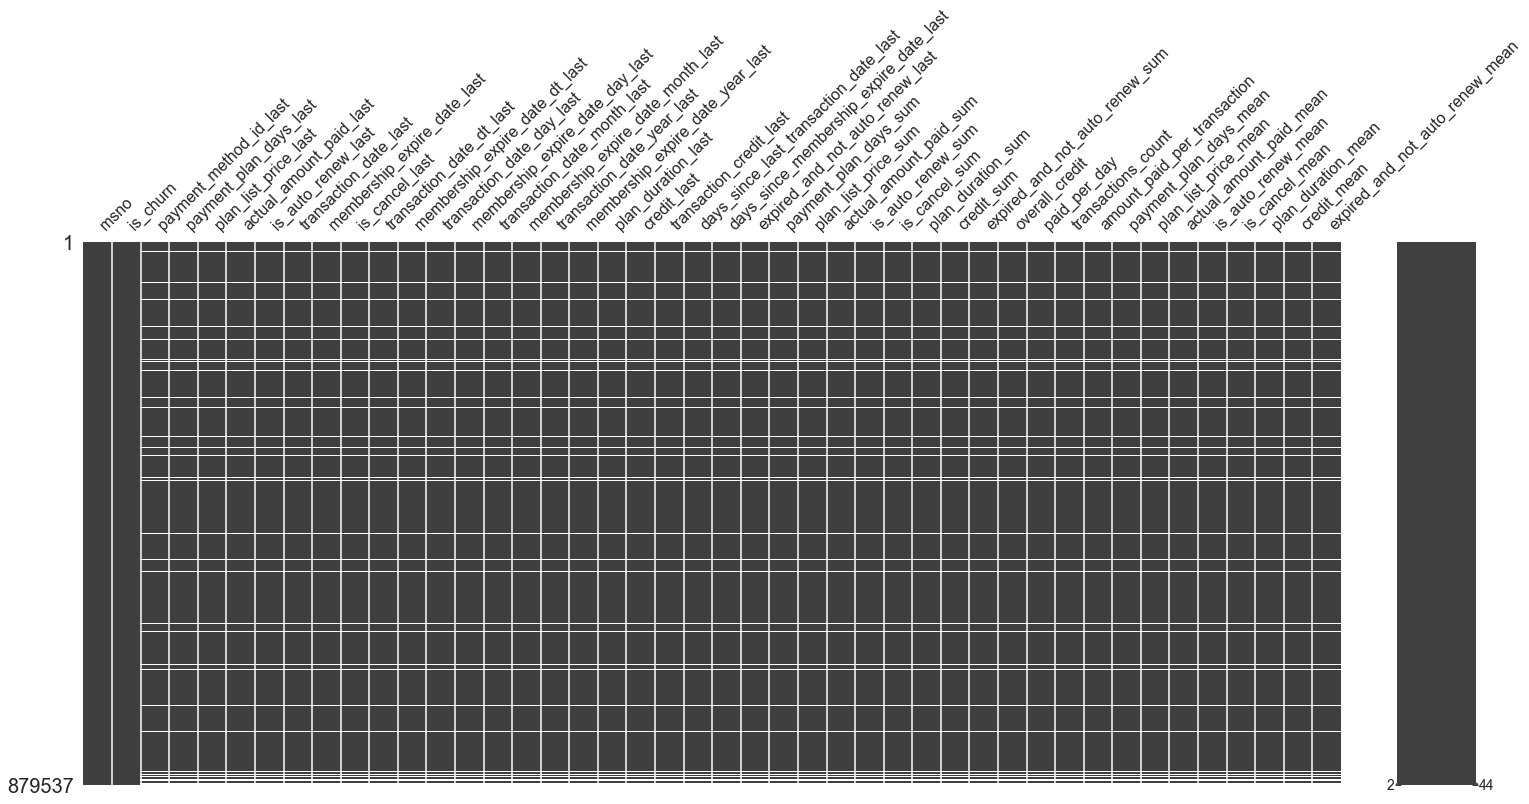

In [42]:
import missingno as ms

ms.matrix(transactions_feb)
plt.tight_layout()
#plt.savefig('missing values.png')

In [43]:
import pickle

with open('Data/Processed/transactions_feb.pickle', 'wb') as handle:
    pickle.dump(transactions_feb, handle)